In [1]:
import ast
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms

from config import *
from utils import stats, show_batch

In [2]:
df = pd.read_csv('cat.csv', usecols=[1, 3])
df = df.loc[df.recognized, 'drawing']
df.head()

0    [[[130, 113, 99, 109, 76, 64, 55, 48, 48, 51, ...
1    [[[222, 196, 176, 173, 179, 191, 233, 251, 255...
2    [[[65, 71, 74, 68, 70, 65, 65], [64, 67, 72, 7...
3    [[[148, 127, 119, 80, 60, 53, 48, 49, 56, 67, ...
4    [[[91, 77, 74, 75, 90, 116, 134, 148, 164, 165...
Name: drawing, dtype: object

In [3]:
def coords2img(row, out_file, out_dir='cat_data'):
    """Convert the line coordinates, stored as a string in the raw dataset,
    into an image and save it in the output directory.
    
    Parameters
    -----------
    row: str
        One item in our df/series corresponding to a single image.
    out_file: str
        File name of output.
    out_dir: str
        Name of output directory.
    """
    output_file = os.path.join(out_dir, f'{out_file}.png')
    lines = [np.array(line)/255 for line in ast.literal_eval(row)]
    # Save as 64px x 64px img. Flip y axis because 0,0 is given as top left.
    fig, ax = plt.subplots(figsize=(.64, .64), dpi=100)
    plt.gca().invert_yaxis()
    for i, line in enumerate(lines):
        ax.plot(line[0, :], line[1, :], '-', c='black')
    plt.axis('off')
    plt.savefig(output_file, dpi=100)
    plt.close()

In [1]:
def gen_images(data, start=0, end=None):
    """Generate images for all examples in our series.
    
    Parameters
    -----------
    data: pd.Series
        Contains stroke coordinatess for all images.
    start: int
        Index of file to start with (useful if memory error forces us to 
        resume in the middle - leave as zero to start from the beginning).
    end: int
        Last file to create (useful for testing - leave as None to create all 
        samples).
    """
    for i, row in enumerate(data[start:end], start):
        if i % 1000 == 0: print(f'Processing file {i}...')
        coords2img(row, i)

In [9]:
gen_images(df)

In [49]:
means = []
stds = []
for i in range(50_000):
    img = read_img(f'cat_data/{i}.png')/255
    mean, std = stats(img)
    means.append(mean)
    stds.append(std)

In [52]:
np.mean(means), np.mean(stds)

(0.87901214, 0.296731308)

In [56]:
quickdraw_tfms = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize([.88, .88, .88],
                                                          [.3, .3, .3])])
quickdraw_ds = ImageFolder('cats', transform=quickdraw_tfms)
quickdraw_dl = DataLoader(quickdraw_ds, batch_size=bs, num_workers=workers)

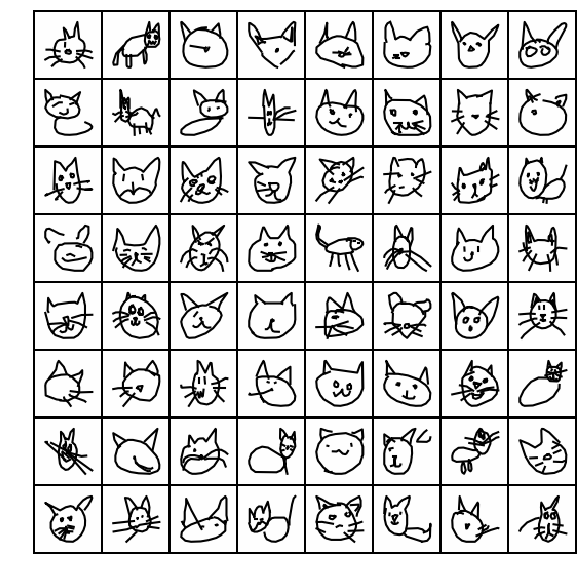

In [58]:
show_batch(quickdraw_dl)